Title: Regression Models

Ridge & Lasso Regression (Regularization Techniques)


Task 1: Use Ridge regression on a dataset with multicollinearity to compare results with linear regression.

Linear Regression Coefficients: [3.27156535 1.7281755 ]
Ridge Regression Coefficients: [2.37384427 2.35785111]
Linear MSE: 0.011915591147330993
Ridge MSE: 0.018379278241624948


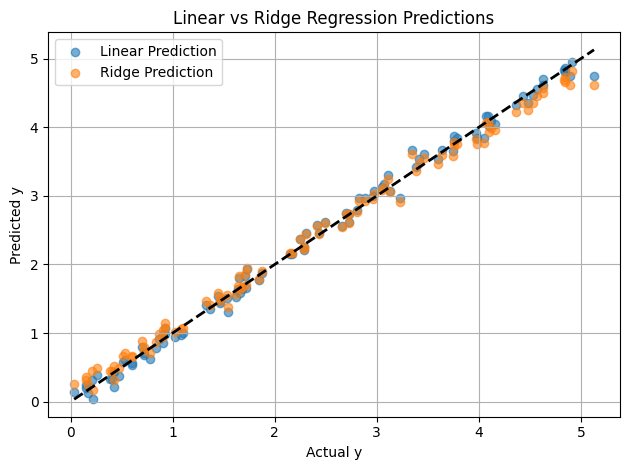

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic data with multicollinearity
np.random.seed(42)
n_samples = 100

X1 = np.random.rand(n_samples)
X2 = X1 + np.random.normal(0, 0.01, n_samples)  # highly correlated with X1
X = np.column_stack((X1, X2))
y = 3 * X1 + 2 * X2 + np.random.normal(0, 0.1, n_samples)

# 2. Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 3. Fit Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

# 4. Compare coefficients and MSE
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)
print("Linear MSE:", mean_squared_error(y, y_pred_lin))
print("Ridge MSE:", mean_squared_error(y, y_pred_ridge))

# 5. Optional: plot predictions
plt.scatter(y, y_pred_lin, alpha=0.6, label='Linear Prediction')
plt.scatter(y, y_pred_ridge, alpha=0.6, label='Ridge Prediction')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)
plt.title('Linear vs Ridge Regression Predictions')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 2: Implement Lasso regression and observe effect on feature selection in feature rich data.

Selected Features (non-zero coefficients): [ 0  1  2  6  7  8  9 15 16 19]
Linear Regression MSE: 0.007882930847272169
Lasso Regression MSE: 0.12138999318863704


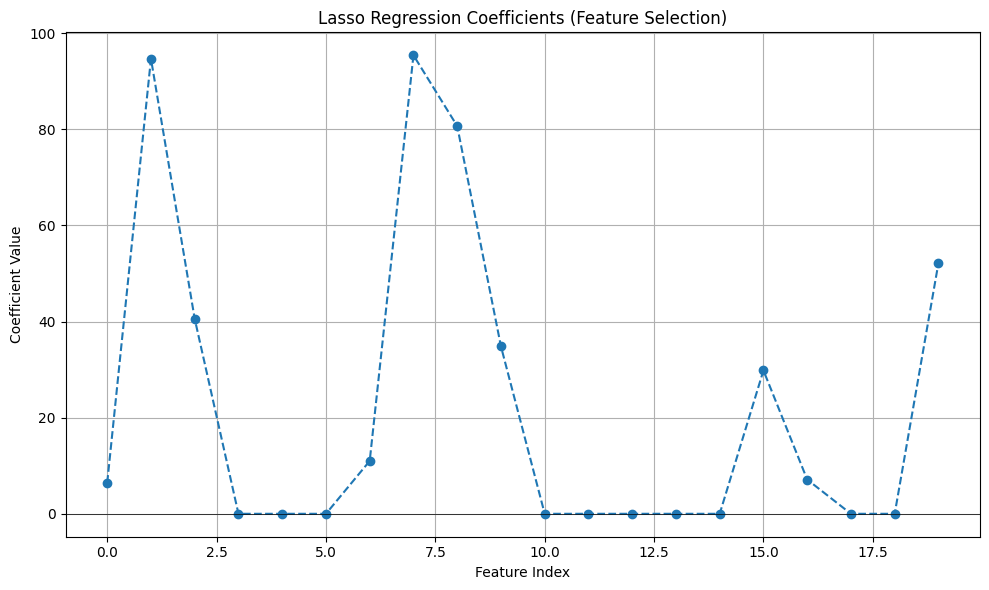

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate synthetic data with many features (feature-rich data)
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# 2. Fit Lasso Regression with a non-zero alpha (regularization strength)
lasso = Lasso(alpha=0.1)  # Larger alpha value will shrink more coefficients to zero
lasso.fit(X, y)

# 3. Get the coefficients of the model
coefficients = lasso.coef_

# 4. Show which features have been shrunk to zero (feature selection)
selected_features = np.where(coefficients != 0)[0]
print(f"Selected Features (non-zero coefficients): {selected_features}")

# 5. Compare with Linear Regression (no regularization)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 6. Lasso Regression Predictions
y_pred_lasso = lasso.predict(X)

# 7. Mean Squared Error (MSE) for both models
mse_lin = mean_squared_error(y, y_pred_lin)
mse_lasso = mean_squared_error(y, y_pred_lasso)
print(f"Linear Regression MSE: {mse_lin}")
print(f"Lasso Regression MSE: {mse_lasso}")

# 8. Plot the coefficients of Lasso Regression
plt.figure(figsize=(10, 6))
plt.plot(coefficients, marker='o', linestyle='--', label='Lasso Coefficients')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Lasso Regression Coefficients (Feature Selection)')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()



Task 3: Regularization effects visualization with model complexity and performance metrics comparison.

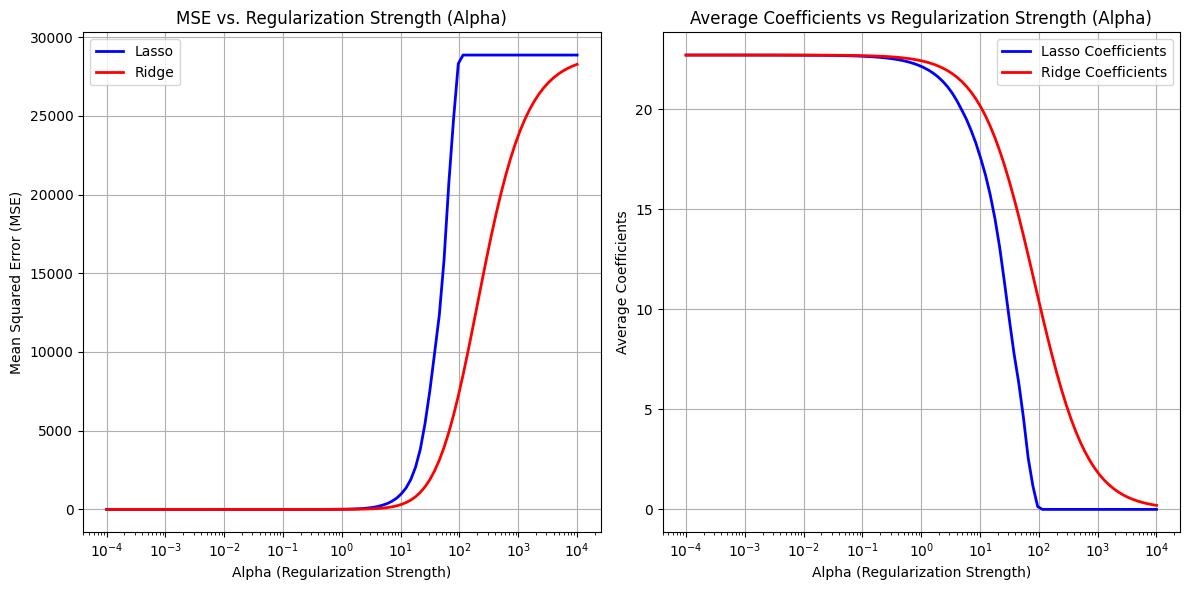

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic data
X, y = make_regression(n_samples=100, n_features=20, noise=0.1, random_state=42)

# 2. Define regularization strengths (alpha values)
alphas = np.logspace(-4, 4, 100)  # Ranges from very small to very large alpha

# 3. Initialize lists to store results
mse_lasso = []
mse_ridge = []
coeff_lasso = []
coeff_ridge = []

# 4. Loop over alpha values and fit models
for alpha in alphas:
    # Lasso Regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    mse_lasso.append(mean_squared_error(y, lasso.predict(X)))
    coeff_lasso.append(lasso.coef_)

    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    mse_ridge.append(mean_squared_error(y, ridge.predict(X)))
    coeff_ridge.append(ridge.coef_)

# 5. Plot MSE vs. Alpha for both models
plt.figure(figsize=(12, 6))

# Plotting MSE for Lasso and Ridge
plt.subplot(1, 2, 1)
plt.semilogx(alphas, mse_lasso, label='Lasso', color='blue', linewidth=2)
plt.semilogx(alphas, mse_ridge, label='Ridge', color='red', linewidth=2)
plt.title('MSE vs. Regularization Strength (Alpha)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)

# 6. Plot Coefficients vs. Alpha for Lasso and Ridge
plt.subplot(1, 2, 2)
plt.semilogx(alphas, np.array(coeff_lasso).mean(axis=1), label='Lasso Coefficients', color='blue', linewidth=2)
plt.semilogx(alphas, np.array(coeff_ridge).mean(axis=1), label='Ridge Coefficients', color='red', linewidth=2)
plt.title('Average Coefficients vs Regularization Strength (Alpha)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Average Coefficients')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

